X = [32, 38, 40, 46, 47, 47, 48, 48, 58, 59]
Y = [34, 41, 47, 50, 51, 58, 58, 61, 62, 63, 67, 72]


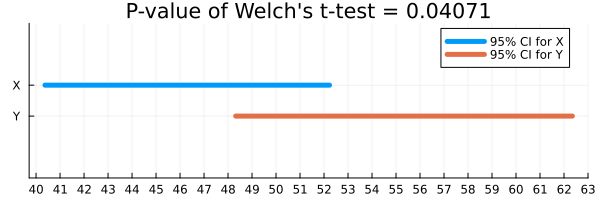

In [1]:
using Distributions
using HypothesisTests
using Random
using StatsPlots
default(fmt=:png)
r(x) = round(x; sigdigits=4)

Random.seed!(4649373)
distx = Normal(50, 10)
disty = Normal(50, 12)
m, n = 10, 12
X = zeros(m)
Y = zeros(n)
for _ in 1:1000
    sort!(rand!(distx, X))
    sort!(rand!(disty, Y))
    @. X = round(X)
    @. Y = round(Y)
    pval = pvalue(UnequalVarianceTTest(X, Y))
    0.04 < pval < 0.05 && break
end
X, Y = Int.(X), Int.(Y)
@show X
@show Y
pval = r.(pvalue(UnequalVarianceTTest(X, Y)))
CI_X = collect(confint(OneSampleTTest(X)))
CI_Y = collect(confint(OneSampleTTest(Y)))

plot(CI_X, fill(1, 2); label="95% CI for X", lw=5)
plot!(CI_Y, fill(0, 2); label="95% CI for Y", lw=5)
plot!(ylim=(-2, 3), xtick=0:200, ytick=([1, 0], ["X", "Y"]))
title!("P-value of Welch's t-test = $pval")
plot!(size=(600, 200))